# Transmission of Air with $O_3$ absorption
==============================================================


The purpose is to calculate the transmission of air due to $O_3$ component at OHP site.

- author : Sylvie Dagoret-Campagne
- date :May  2nd 2017
- Update May 6th 2017

$O_3$ from Hitran and O3 from LibRadtran/CRS

In [136]:
import numpy as np
import pandas as pd

# Set up matplotlib and use a nicer set of plot parameters
#%config InlineBackend.rc = {}
import matplotlib
#matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt

%matplotlib inline

#import matplotlib as mpl

In [137]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [138]:
import os

In [139]:
from netCDF4 import Dataset

In [140]:
from spacepy import pycdf
import datetime

os.environ["CDF_LIB"]='/Users/dagoret-campagnesylvie/MacOsX/External/cdf/cdf/lib'
os.environ["CDF_LIB"]='/Users/dagoret-campagnesylvie/MacOsX/External/netcdf/lib'

# Initialisation

## Constants

In [141]:
Pa_to_Atm = 0.00000986923267
hPa_to_Atm=Pa_to_Atm*100  # libRadTran provides pressure in hPa
Atm_to_Pa = 1.01325*1e5 
Atm_to_hPa = 1.01325*1e3 

In [142]:
m_to_cm=100.

In [143]:
path='/Users/dagoret-campagnesylvie/MacOsX/LSST/softs/libRadtran-2.0.1/data/correlated_k/reptran'

In [144]:
ls /Users/dagoret-campagnesylvie/MacOsX/LSST/softs/libRadtran-2.0.1/data/correlated_k/reptran | grep O3

reptran_solar_coarse.lookup.O3.cdf
reptran_solar_envisat.lookup.O3.cdf
reptran_solar_ers.lookup.O3.cdf
reptran_solar_fine.lookup.O3.cdf
reptran_solar_medium.lookup.O3.cdf
reptran_solar_msg.lookup.O3.cdf
reptran_solar_sentinel.lookup.O3.cdf
reptran_thermal_coarse.lookup.O3.cdf
reptran_thermal_earthcare.lookup.O3.cdf
reptran_thermal_envisat.lookup.O3.cdf
reptran_thermal_ers.lookup.O3.cdf
reptran_thermal_fine.lookup.O3.cdf
reptran_thermal_landsat.lookup.O3.cdf
reptran_thermal_medium.lookup.O3.cdf
reptran_thermal_msg.lookup.O3.cdf
reptran_thermal_sentinel.lookup.O3.cdf


In [145]:
file_O3_list= ['reptran_solar_coarse.lookup.O3.cdf','reptran_solar_medium.lookup.O3.cdf','reptran_solar_fine.lookup.O3.cdf',
...            'reptran_solar_ers.lookup.O3.cdf','reptran_solar_msg.lookup.O3.cdf','reptran_solar_sentinel.lookup.O3.cdf']

In [146]:
file_all_list=['reptran_solar_coarse.cdf','reptran_solar_medium.cdf','reptran_solar_fine.cdf']

## Test pycdf

In [182]:
fullfilename=os.path.join(path,file_O3_list[4])

In [183]:
print fullfilename

/Users/dagoret-campagnesylvie/MacOsX/LSST/softs/libRadtran-2.0.1/data/correlated_k/reptran/reptran_solar_msg.lookup.O3.cdf


## try opening with pycdf

- failed because this cdf format is not recognized

In [184]:
#cdf = pycdf.CDF(fullfilename)

## try opening with netcdf

### O3 files

In [185]:
fh = Dataset(fullfilename, mode='r')

In [186]:
fh

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): nwvl(31), n_vmrs(1), n_pressure(41), n_t_pert(9)
    variables(dimensions): float64 wvl(nwvl), int32 wvl_index(nwvl), float64 pressure(n_pressure), float64 vmrs(n_vmrs), float64 t_ref(n_pressure), float64 t_pert(n_t_pert), float32 xsec(n_t_pert,n_vmrs,nwvl,n_pressure)
    groups: 

In [187]:
print fh.dimensions.keys()

[u'nwvl', u'n_vmrs', u'n_pressure', u'n_t_pert']


In [188]:
print fh.dimensions['nwvl']

<type 'netCDF4._netCDF4.Dimension'>: name = 'nwvl', size = 31



In [189]:
print fh.dimensions['n_vmrs']

<type 'netCDF4._netCDF4.Dimension'>: name = 'n_vmrs', size = 1



In [190]:
print fh.dimensions['n_pressure']

<type 'netCDF4._netCDF4.Dimension'>: name = 'n_pressure', size = 41



In [191]:
print fh.dimensions['n_t_pert']

<type 'netCDF4._netCDF4.Dimension'>: name = 'n_t_pert', size = 9



In [192]:
print fh.variables.keys()

[u'wvl', u'wvl_index', u'pressure', u'vmrs', u't_ref', u't_pert', u'xsec']


In [193]:
print fh.variables['wvl']

<type 'netCDF4._netCDF4.Variable'>
float64 wvl(nwvl)
unlimited dimensions: 
current shape = (31,)
filling off



In [194]:
print fh.variables['wvl_index']

<type 'netCDF4._netCDF4.Variable'>
int32 wvl_index(nwvl)
unlimited dimensions: 
current shape = (31,)
filling off



In [195]:
print fh.variables['pressure']

<type 'netCDF4._netCDF4.Variable'>
float64 pressure(n_pressure)
unlimited dimensions: 
current shape = (41,)
filling off



In [196]:
print fh.variables['vmrs']

<type 'netCDF4._netCDF4.Variable'>
float64 vmrs(n_vmrs)
unlimited dimensions: 
current shape = (1,)
filling off



In [197]:
print fh.variables['t_ref']

<type 'netCDF4._netCDF4.Variable'>
float64 t_ref(n_pressure)
unlimited dimensions: 
current shape = (41,)
filling off



In [198]:
print fh.variables['t_pert']

<type 'netCDF4._netCDF4.Variable'>
float64 t_pert(n_t_pert)
unlimited dimensions: 
current shape = (9,)
filling off



In [199]:
print fh.variables['xsec']

<type 'netCDF4._netCDF4.Variable'>
float32 xsec(n_t_pert, n_vmrs, nwvl, n_pressure)
unlimited dimensions: 
current shape = (9, 1, 31, 41)
filling off



In [200]:
for attr in fh.ncattrs(): 
...     print attr, '=', getattr(dataset, attr) 

In [201]:
wvl = fh.variables['wvl'][:]
wvl_index = fh.variables['wvl_index'][:]
pressure = fh.variables['pressure'][:]
vmrs = fh.variables['vmrs'][:]
t_ref= fh.variables['t_ref'][:]
t_pert= fh.variables['t_pert'][:]
xsec= fh.variables['xsec'][:,:,:,:]
#xsec_units = fh.variables['wvl'].units


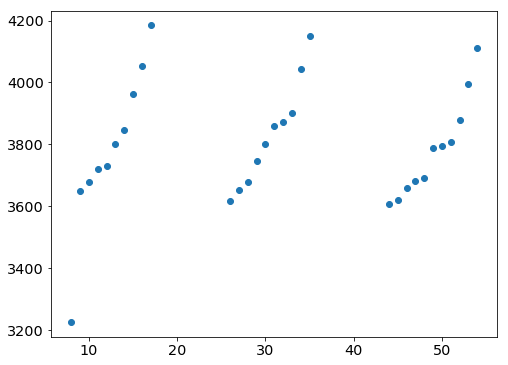

In [202]:
plt.plot(wvl_index,wvl,'o')

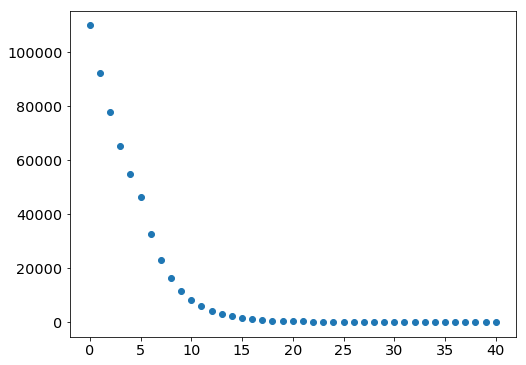

In [203]:
plt.plot(pressure,'o')

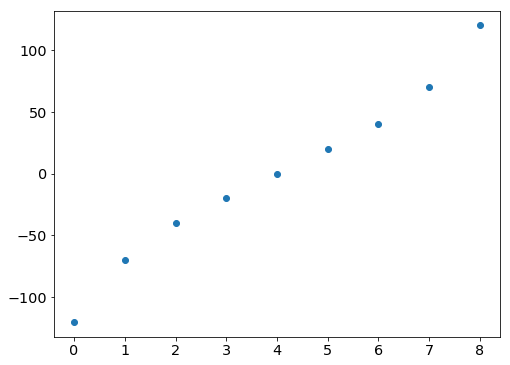

In [204]:
plt.plot(t_pert,'o')

In [205]:
xsec0=xsec[4,0,:,1]

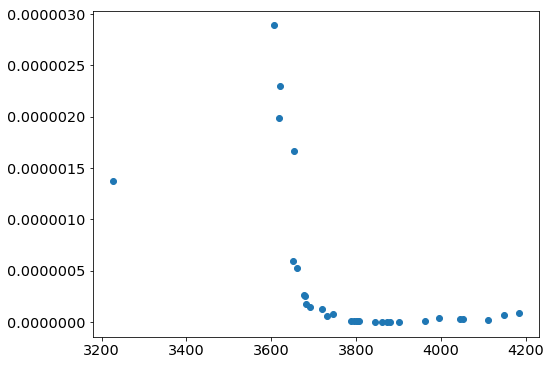

In [206]:
plt.plot(wvl,xsec0,'o')

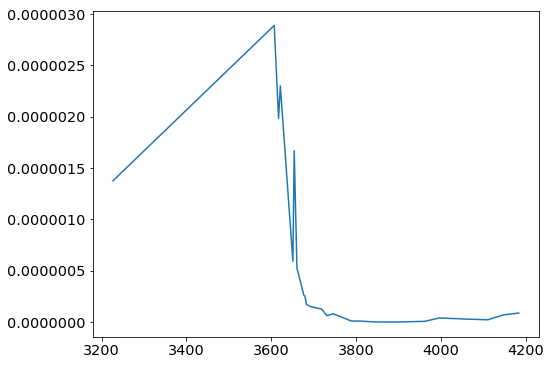

In [207]:
plt.plot(wvl,xsec0)
#plt.xlim(2000.,3000.)
#plt.ylim(0,0.00001)

### Combined files

In [208]:
fullfilename_all=os.path.join(path,file_all_list[0])

In [209]:
fh_all = Dataset(fullfilename_all, mode='r')

In [210]:
fh_all 

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): nwvl(7563), nbands(5423), max_nwvl_in_band(22), nspecies(8), max_len_species_name(4), max_len_band_name(500)
    variables(dimensions): float64 wvl(nwvl), float64 extra(nwvl), float64 wvlmin(nbands), float64 wvlmax(nbands), float64 wvl_integral(nbands), float64 avg_error(nbands), float64 max_error(nbands), int32 nwvl_in_band(nbands), int32 iwvl(max_nwvl_in_band,nbands), float64 iwvl_weight(max_nwvl_in_band,nbands), |S1 band_name(nbands,max_len_band_name), |S1 species_name(nspecies,max_len_species_name), int32 cross_section_source(nwvl,nspecies)
    groups: 

In [211]:
print 'dimensions :: ',fh_all.dimensions.keys()
print 'variables  ::',fh_all.variables.keys()

dimensions ::  [u'nwvl', u'nbands', u'max_nwvl_in_band', u'nspecies', u'max_len_species_name', u'max_len_band_name']
variables  :: [u'wvl', u'extra', u'wvlmin', u'wvlmax', u'wvl_integral', u'avg_error', u'max_error', u'nwvl_in_band', u'iwvl', u'iwvl_weight', u'band_name', u'species_name', u'cross_section_source']


In [212]:
print fh_all.variables['wvl']

<type 'netCDF4._netCDF4.Variable'>
float64 wvl(nwvl)
    units: nm
    description: Representative wavelengths from all bands
unlimited dimensions: 
current shape = (7563,)
filling off



In [213]:
print fh_all.variables['cross_section_source']

<type 'netCDF4._netCDF4.Variable'>
int32 cross_section_source(nwvl, nspecies)
    units: -
    description: Specifies the source of the absorption cross section for each species and wavelength (0: no absorption from lookup table, 1: absorption from lookup table)
unlimited dimensions: 
current shape = (7563, 8)
filling off



In [214]:
print fh_all.variables['species_name']

<type 'netCDF4._netCDF4.Variable'>
|S1 species_name(nspecies, max_len_species_name)
    units: -
    description: Species for which the parameterization has been created and absorption cross sections are available
unlimited dimensions: 
current shape = (8, 4)
filling off



In [215]:
wvl = fh_all.variables['wvl'][:]
species_name = fh_all.variables['species_name'][:,:]
#pressure = fh.variables['pressure'][:]
#vmrs = fh.variables['vmrs'][:]
#t_ref= fh.variables['t_ref'][:]
#t_pert= fh.variables['t_pert'][:]
xsec= fh_all.variables['cross_section_source'][:,:]

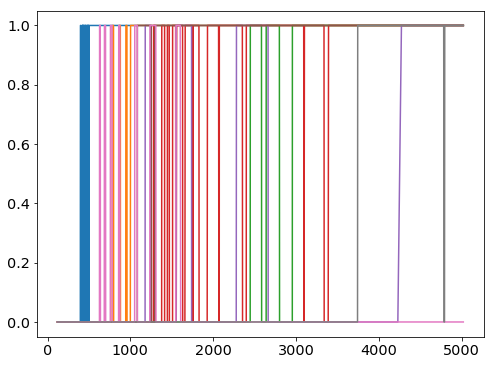

In [216]:
plt.plot(wvl,xsec[:,0])
plt.plot(wvl,xsec[:,1])
plt.plot(wvl,xsec[:,2])
plt.plot(wvl,xsec[:,3])
plt.plot(wvl,xsec[:,4])
plt.plot(wvl,xsec[:,5])
plt.plot(wvl,xsec[:,6])
plt.plot(wvl,xsec[:,7])